# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

C:\Users\Rae\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [5]:
X_train.shape

(50000, 32, 32, 3)

# Visualize The Data

[5]


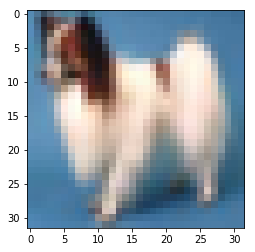

In [10]:
i = 4000
plt.imshow(X_train[i])
print(y_train[i])

In [ ]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

# Data Preperation


In [19]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [20]:
number_cat = 10

In [23]:
#convert catagories from base ten numbers to binary
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)

In [25]:
#normalizing the data
X_train = X_train/255
X_test = X_test/255

In [26]:
Input_shape = X_train.shape[1:]

# Model Training